# JavaWeb Servlet and JSP

 --- 

**Background:**

+ java SE: Java Platform, Standard Edition (`Java SE`) is a computing platform for development and deployment of portable code for desktop and server environments. `Java SE was` formerly known as Java 2 Platform, Standard Edition (`J2SE`).  


+ java EE: `Jakarta EE`, formerly Java Platform, Enterprise Edition (`Java EE`) and Java 2 Platform, Enterprise Edition (`J2EE`) is a set of specifications, extending `Java SE` with specifications for enterprise features such as distributed computing and web services. 


+ Jakarta EE applications are run on reference runtimes, that can be microservices or application servers, which handle transactions, security, scalability, concurrency and management of the components it is deploying.  

> **Notes:**  
The open source version of Java Enterprise Edition (`Java EE`) has been renamed `Jakarta EE` to satisfy Oracle's desire to control the "Java" brand.  
`Jakarta` is named after(以..命名) the conference room(会议室) at Sun Microsystems(Sun微系统公司) where the majority of discussions leading to the project's creation took place. At the time, Sun's Java software division(部门) was headquartered(将(组织的)总部设在某地) in a Cupertino building where the conference room names were all coffee references.

## Web server

---

A web server is computer software and underlying hardware that accepts requests via HTTP, the network protocol created to distribute web pages, or its secure variant HTTPS. 

## Servlet

---

A servlet is simply a java class which responds to a particular type of network request - most commonly an HTTP request. Basically servlets are usually used to implement web applications - but there are also various frameworks which operate on top of servlets (e.g. Struts) to give a higher-level abstraction than the "here's an HTTP request, write to this HTTP response" level which servlets provide.

Servlets run in a servlet container which handles the networking side (e.g. parsing an HTTP request, connection handling etc). One of the best-known open source servlet containers is Tomcat.

## Web container

---

A web container (also known as a servlet container) is the component of a web server that interacts with `Jakarta Servlets`.


**Open source Web containers**

Apache Tomcat (formerly Jakarta Tomcat) is an open source web container available under the Apache Software License.
Apache Tomcat 6 and above are operable as general application container (prior versions were web containers only)

## JSP

---

Jakarta Server Pages (JSP; formerly JavaServer Pages) is a collection of technologies that helps software developers create dynamically generated web pages based on HTML, XML, SOAP, or other document types. Released in 1999 by Sun Microsystems, JSP is similar to PHP and ASP, but uses the Java programming language.

To deploy and run Jakarta Server Pages, a compatible web server with a servlet container, such as `Apache Tomcat `or `Jetty`, is required.


## Difference between Servlet and JSP

---

| Servlet | JSP |
| :---- |  :---- |
| Servlet is a java code. | JSP is a html based code. |
| Writing code for servlet is harder than JSP as it is html in java. | JSP is easy to code as it is java in html.|
| Servlet plays a controller role in MVC approach. | JSP is the view in MVC approach for showing output. |
|Servlet is faster than JSP.|JSP is slower than Servlet because the first step in JSP lifecycle is the translation of JSP to java code and then compile.|
|Servlet can accept all protocol requests.|JSP only accept http requests.|
|In Servlet, we can override the service() method.|In JSP, we cannot override its service() method.|
|In Servlet by default session management is not enabled, user have to enable it explicitly.|In JSP session management is automatically enabled.|
|In Servlet we have to implement everything like business logic and presentation logic in just one servlet file.|In JSP business logic is separated from presentation logic by using javaBeans.|
|Modification in Servlet is a time consuming task because it includes reloading, recompiling and restarting the server.|JSP modification is fast, just need to click the refresh button.|


## Life cycle of a servlet

---

A servlet life cycle can be defined as the entire process from its creation till the destruction. The following are the paths followed by a servlet.

+ The servlet is initialized by calling the init() method.

+ The servlet calls service() method to process a client's request.

+ The servlet is terminated by calling the destroy() method.

+ Finally, servlet is garbage collected by the garbage collector of the JV


### The init() Method

The init method is called only once. It is called **only** when the servlet is created, and not called for any user requests afterwards. So, it is used for one-time initializations, just as with the init method of applets.

The servlet is normally created when a user first invokes a URL corresponding to the servlet, but you can also specify that the servlet be loaded when the server is first started.

When a user invokes a servlet, a single instance of each servlet gets created, with each user request resulting in a new thread that is handed off to doGet or doPost as appropriate. The init() method simply creates or loads some data that will be used throughout the life of the servlet.


```java
//init() method

public class MyServlet implements Servlet{
   public void init(ServletConfig config) throws ServletException {
        //initialization code
   }
    //rest of code
}
```

### The service() Method

The service() method is the main method to perform the actual task. The servlet container (i.e. tomcat) calls the service() method to handle requests coming from the client( browsers) and to write the formatted response back to the client.

Each time the web server receives a request for a servlet, the server spawns(产卵) a new thread and calls service. The service() method checks the HTTP request type (GET, POST, PUT, DELETE, etc.) and calls doGet, doPost, doPut, doDelete, etc. methods as appropriate.


```java
// service() method

public class MyServlet implements Servlet{
    
    public void service(ServletRequest request, ServletResponse response) 
        throws ServletException, IOException {
        
    }
    
}
```

The service () method is called by the container and service method invokes doGet, doPost, doPut, doDelete, etc. methods as appropriate. So you have nothing to do with service() method but you override either doGet() or doPost() depending on what type of request you receive from the client.

#### The doGet() Method

A GET request results from a normal request for a URL or from an HTML form that has no METHOD specified and it should be handled by doGet() method.

```java
public void doGet(HttpServletRequest request, HttpServletResponse response)
   throws ServletException, IOException {
   // Servlet code
}
```

#### The doPost() Method
A POST request results from an HTML form that specifically lists POST as the METHOD and it should be handled by doPost() method.

```java
public void doPost(HttpServletRequest request, HttpServletResponse response)
   throws ServletException, IOException {
   // Servlet code
}
```

#### The destroy() Method
The destroy() method is called **only once** at the end of the life cycle of a servlet. This method gives your servlet a chance to close database connections, halt background threads, write cookie lists or hit counts to disk, and perform other such cleanup activities.

After the destroy() method is called, the servlet object is marked for garbage collection. The destroy method definition looks like this −

```java
public void destroy() {
   // Finalization code...
}
```


### The following is a typical user scenario of these methods.

1. Assume that a user requests to visit a URL.
    + The browser then generates an HTTP request for this URL.
    + This request is then sent to the appropriate server.


2. The HTTP request is received by the web server and forwarded to the servlet container.
    + The container maps this request to a particular servlet.
    + The servlet is dynamically retrieved and loaded into the address space of the container.
    

3. The container invokes the `init()` method of the servlet.
    + This method is invoked only when the servlet is first loaded into memory.
    + It is possible to pass initialization parameters to the servlet so that it may configure itself.
    
    
4. The container invokes the `service()` method of the servlet.
    + This method is called to process the HTTP request.
    + The servlet may read data that has been provided in the HTTP request.
    + The servlet may also formulate an HTTP response for the client.


5. The servlet remains in the container's address space and is available to process any other HTTP requests received from clients.
    + The `service()` method is called for each HTTP request.


6. The container may, at some point, decide to unload the servlet from its memory.
    + The algorithms by which this decision is made are specific to each container.
    
    
7. The container calls the servlet's `destroy()` method to relinquish any resources such as file handles that are allocated for the servlet; important data may be saved to a persistent store.


8. The memory allocated for the servlet and its objects can then be garbage collected.

### Architecture Diagram

The following figure depicts a typical servlet life-cycle scenario.


+ First the HTTP requests coming to the server are delegated(delegate 委派……为代表，任命) to the servlet container.


+ The servlet container loads the servlet before invoking the service() method.


+ Then the servlet container handles multiple requests by spawning multiple threads, each thread executing the service() method of a single instance of the servlet.

### Example

The following example servlet prints how many times its service() method was called.

Note that HttpServlet is a subclass of GenericServlet, an implementation of the Servlet interface.

The service() method of HttpServlet class dispatches(派遣，发送) requests to the methods doGet(), doPost(), doPut(), doDelete(), and so on; according to the HTTP request. In the example below service() is overridden and does not distinguish which HTTP request method it serves.

```java
import java.io.IOException;

import javax.servlet.ServletConfig;
import javax.servlet.ServletException;
import javax.servlet.http.HttpServlet;
import javax.servlet.http.HttpServletRequest;
import javax.servlet.http.HttpServletResponse;

public class ServletLifeCycleExample extends HttpServlet {
    private Integer sharedCounter;

    @Override
    public void init(final ServletConfig config) throws ServletException {
        super.init(config);
        getServletContext().log("init() called");
        sharedCounter = 0;
    }

    @Override
    protected void service(final HttpServletRequest request, final HttpServletResponse response) throws ServletException, IOException {
        getServletContext().log("service() called");
        int localCounter;
        synchronized (sharedCounter) {
            sharedCounter++;
            localCounter = sharedCounter;
        }
        response.getWriter().write("Incrementing the count to " + localCounter);  // accessing a local variable
    }

    @Override
    public void destroy() {
        getServletContext().log("destroy() called");
    }
}

```

t

## Life cycle of JSP

---

The following are the paths followed by a JSP −

+ Compilation
+ Initialization
+ Execution
+ Cleanup

### JSP Compilation

When a browser asks for a JSP, the JSP engine first checks to see whether it needs to compile the page. If the page has never been compiled, or if the JSP has been modified since it was last compiled, the JSP engine compiles the page.

The compilation process involves three steps −

+ Parsing the JSP.
+ Turning the JSP into a servlet.
+ Compiling the servlet.


### JSP Initialization

When a container loads a JSP it invokes the jspInit() method before servicing any requests. If you need to perform JSP-specific initialization, override the jspInit() method −

```java
public void jspInit(){
   // Initialization code...
}
```

Typically, initialization is performed only once and as with the servlet init method, you generally initialize database connections, open files, and create lookup tables in the jspInit method.

### JSP Execution

This phase of the JSP life cycle represents all interactions with requests until the JSP is destroyed.

Whenever a browser requests a JSP and the page has been loaded and initialized, the JSP engine invokes the **_jspService()** method in the JSP.

The **_jspService()** method takes an HttpServletRequest and an HttpServletResponse as its parameters as follows −

```java
void _jspService(HttpServletRequest request, HttpServletResponse response) {
   // Service handling code...
}
```

The **_jspService()** method of a JSP is invoked on request basis. This is responsible for generating the response for that request and this method is also responsible for generating responses to all seven of the HTTP methods, i.e, GET, POST, DELETE, etc.

### JSP Cleanup

The destruction phase of the JSP life cycle represents when a JSP is being removed from use by a container.

The jspDestroy() method is the JSP equivalent of the destroy method for servlets. Override jspDestroy when you need to perform any cleanup, such as releasing database connections or closing open files.

The jspDestroy() method has the following form −

```java
public void jspDestroy() {
   // Your cleanup code goes here.
}

### Compiler

A JavaServer Pages compiler is a program that parses JSPs, and transforms them into executable Java Servlets. A program of this type is usually embedded into the application server and run automatically the first time a JSP is accessed, but pages may also be precompiled for better performance, or compiled as a part of the build process to test for errors. **Life of a JSP file**:


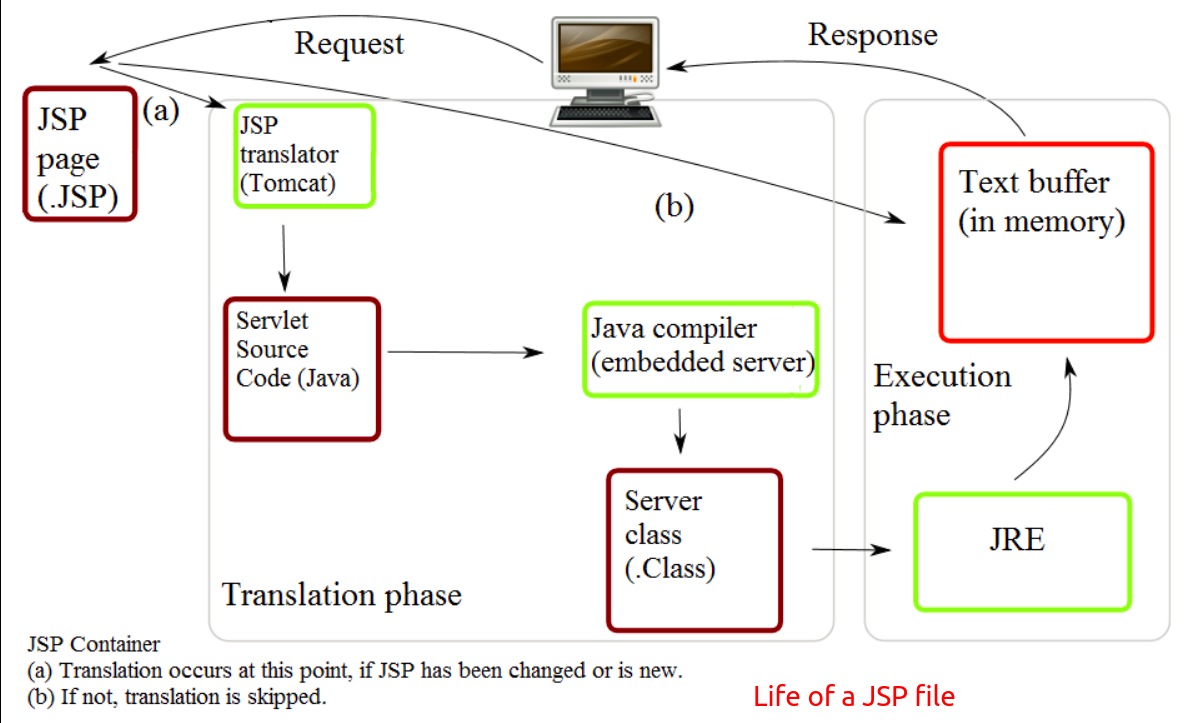